<a href="https://colab.research.google.com/github/AbdelrahmanWalidHafez/AbdelrahmanWalidHafez/blob/main/DM_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Modules

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.1 MB/s eta 0:00:00


In [124]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV

Loading The Dataset


In [ ]:
dataset=pd.read_csv('/content/loan_data.csv',on_bad_lines='skip')

<ipython-input-67-20294d945137>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('/content/loan_data.csv',on_bad_lines='skip')


Exploring The Dataset and Visulaization

In [ ]:
dataset.shape #prints (rows,columns)

(76808, 17)

In [ ]:
dataset.head(10)#prints first 10 records

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,id,temp_flag,five_times_income
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561.0,No,1.0,1,0,359740.0
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504.0,Yes,0.0,2,0,61410.0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635.0,No,1.0,3,0,62190.0
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675.0,No,1.0,4,0,398765.0
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586.0,No,1.0,5,0,330675.0
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532.0,No,1.0,6,0,64755.0
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701.0,No,1.0,7,0,467355.0
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585.0,No,1.0,8,0,477750.0
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544.0,No,1.0,9,0,503420.0
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640.0,No,1.0,10,0,63695.0


In [ ]:
dataset.tail(10)#prints last 10 records

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,id,temp_flag,five_times_income
76798,31.0,male,Master,136832.0,9,RENT,12319.0,PERSONAL,16.92,0.09,7.0,722.0,No,1.0,76799,0,684160.0
76799,24.0,male,High School,37786.0,0,MORTGAGE,13500.0,EDUCATION,13.43,0.36,4.0,612.0,No,1.0,76800,0,188930.0
76800,23.0,female,Bachelor,40925.0,0,RENT,9000.0,PERSONAL,11.01,0.22,4.0,487.0,No,1.0,76801,0,204625.0
76801,27.0,female,High School,35512.0,4,RENT,5000.0,PERSONAL,15.83,0.14,5.0,505.0,No,1.0,76802,0,177560.0
76802,24.0,female,Associate,31924.0,2,RENT,12229.0,MEDICAL,10.70,0.38,4.0,678.0,No,1.0,76803,0,159620.0
76803,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645.0,No,1.0,76804,0,239855.0
76804,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621.0,No,1.0,76805,0,329000.0
76805,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668.0,No,1.0,76806,0,284710.0
76806,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604.0,No,1.0,76807,0,165820.0
76807,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628.0,No,1.0,76808,0,258045.0


In [ ]:
dataset.info()#describes the columns (DataTypes, non-null values,column names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76808 entries, 0 to 76807
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      76808 non-null  float64
 1   person_gender                   76808 non-null  object 
 2   person_education                76808 non-null  object 
 3   person_income                   76808 non-null  float64
 4   person_emp_exp                  76808 non-null  object 
 5   person_home_ownership           76808 non-null  object 
 6   loan_amnt                       76807 non-null  float64
 7   loan_intent                     76807 non-null  object 
 8   loan_int_rate                   76807 non-null  float64
 9   loan_percent_income             76807 non-null  float64
 10  cb_person_cred_hist_length      76807 non-null  float64
 11  credit_score                    76807 non-null  float64
 12  previous_loan_defaults_on_file  

In [ ]:
dataset.describe()#prints statistical values

,person_age,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,id,temp_flag,five_times_income
count,76808.000000,7.680800e+04,76807.000000,76807.000000,76807.000000,76807.000000,76807.000000,76807.000000,76808.000000,76808.0,7.680800e+04
mean,28.479400,8.285629e+04,9737.572487,11.018281,0.138888,6.360618,633.696278,0.220449,38404.500000,0.0,4.142814e+05
std,6.189171,8.571748e+04,6400.451581,2.966650,0.087209,3.982812,50.510358,0.414552,22172.704075,0.0,4.285874e+05
min,14.740000,6.750000e+02,500.000000,0.910000,0.000000,2.000000,390.000000,0.000000,1.000000,0.0,3.375000e+03
25%,24.000000,4.799550e+04,5000.000000,8.610000,0.070000,3.000000,602.000000,0.000000,19202.750000,0.0,2.399775e+05
50%,27.000000,6.845700e+04,8000.000000,11.010000,0.120000,5.000000,641.000000,0.000000,38404.500000,0.0,3.422850e+05
75%,31.000000,9.855800e+04,13000.000000,12.990000,0.190000,9.000000,671.000000,0.000000,57606.250000,0.0,4.927900e+05
max,144.000000,7.200766e+06,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000,76808.000000,0.0,3.600383e+07


In [ ]:
dataset.isnull().sum() #prints the count of null values in each row

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,1
loan_intent,1
loan_int_rate,1
loan_percent_income,1


In [ ]:
dataset.nunique() #prints the count of unique values in each row

,0
person_age,61
person_gender,3
person_education,6
person_income,33990
person_emp_exp,101
person_home_ownership,5
loan_amnt,4483
loan_intent,6
loan_int_rate,1303
loan_percent_income,64


In [ ]:
dataset["person_gender"].value_counts()


,count
person_gender,
male,42408
female,34399
0.17,1


<Axes: xlabel='person_gender', ylabel='Count'>

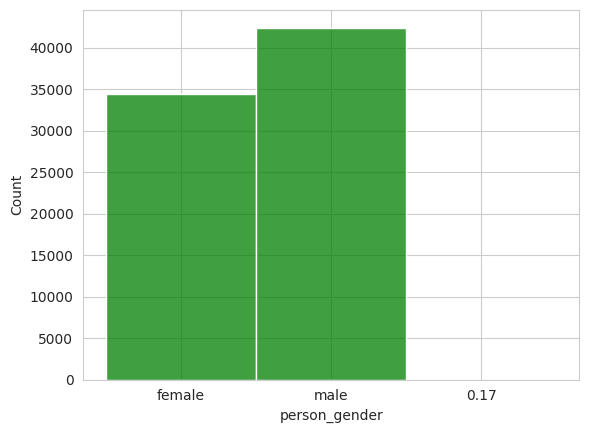

In [ ]:
sb.set_style('whitegrid')
sb.histplot(dataset['person_gender'],color ='green', bins = 10)

<Axes: xlabel='person_education', ylabel='Count'>

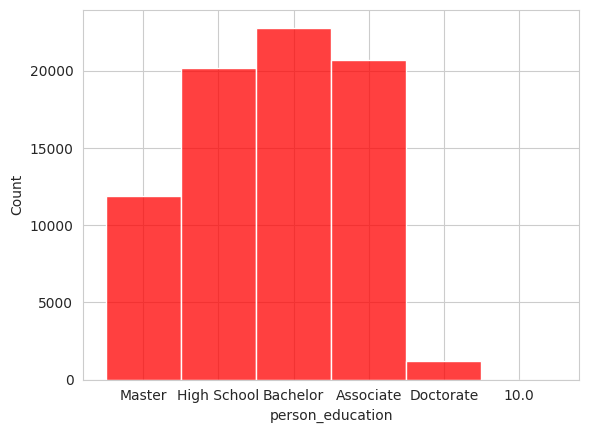

In [ ]:
sb.set_style('whitegrid')
sb.histplot(dataset['person_education'],color ='red', bins = 10)

<Axes: xlabel='person_home_ownership', ylabel='Count'>

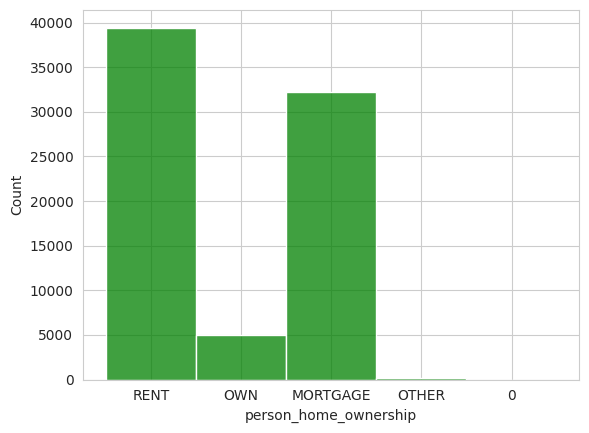

In [ ]:
sb.set_style('whitegrid')
sb.histplot(dataset['person_home_ownership'],color ='green', bins = 10)

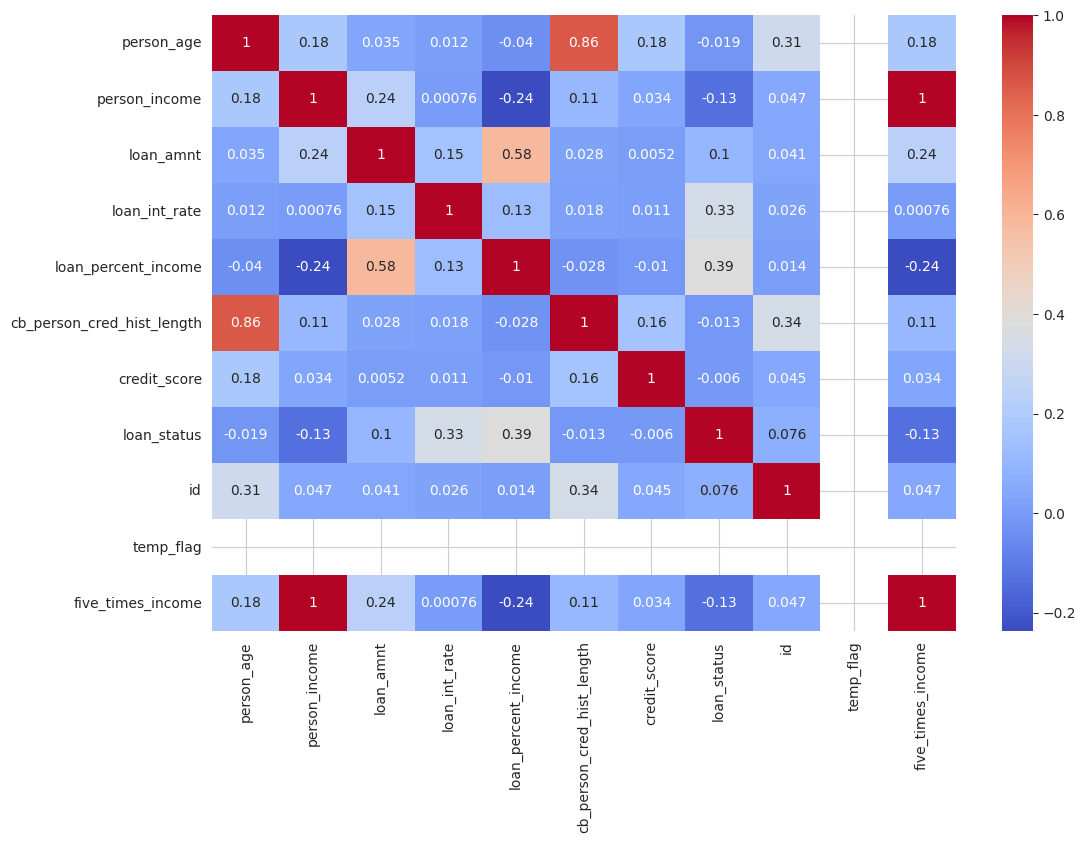

In [ ]:
numeric_dataset = dataset.select_dtypes(include=np.number)
plt.figure(figsize=(12,8))
sb.heatmap(numeric_dataset.corr(), annot=True, cmap="coolwarm")
plt.show()

Data Preprocessing

In [ ]:
dataset = dataset.drop(columns=['id', 'temp_flag', 'five_times_income'])


KeyError: "['id', 'temp_flag', 'five_times_income'] not found in axis"

In [ ]:
dataset = dataset[dataset['person_home_ownership'] != '0']
dataset = dataset[dataset['person_education'] != '10']
dataset = dataset[dataset['person_gender'] != '0.17']

In [ ]:
dataset.nunique()


,0
person_age,60
person_gender,2
person_education,5
person_income,33989
person_emp_exp,100
person_home_ownership,4
loan_amnt,4483
loan_intent,6
loan_int_rate,1303
loan_percent_income,64


In [ ]:
dataset.dropna(inplace=True)
dataset.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [ ]:
features=dataset.drop(columns=['loan_status'])
class_label=dataset['loan_status']
features_train,features_test,class_label_train,class_label_test=train_test_split(features,class_label,test_size=0.30,random_state=42)

Algorithm

In [126]:
categorical_features_names = dataset.select_dtypes(include=['object']).columns.tolist()
model=CatBoostClassifier(iterations=100,cat_features=categorical_features_names)
param_grid1 = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5]}
param_grid2= {'depth': [3, 5, 7, 9, 11]}
grid_search1= GridSearchCV(model, param_grid1, cv=5, scoring='accuracy')
grid_search2= GridSearchCV(model, param_grid2, cv=5, scoring='accuracy')
grid_search1.fit(features_train, class_label_train)
grid_search2.fit(features_train, class_label_train)
best_learning_rate = grid_search1.best_params_['learning_rate']
best_depth = grid_search2.best_params_['depth']

Streaming output truncated to the last 5000 lines.
26:	learn: 0.5450308	total: 527ms	remaining: 1.43s
27:	learn: 0.5406559	total: 546ms	remaining: 1.4s
28:	learn: 0.5363261	total: 564ms	remaining: 1.38s
29:	learn: 0.5319052	total: 582ms	remaining: 1.36s
30:	learn: 0.5277757	total: 600ms	remaining: 1.34s
31:	learn: 0.5235501	total: 619ms	remaining: 1.31s
32:	learn: 0.5193033	total: 637ms	remaining: 1.29s
33:	learn: 0.5151174	total: 658ms	remaining: 1.28s
34:	learn: 0.5111084	total: 677ms	remaining: 1.26s
35:	learn: 0.5071535	total: 695ms	remaining: 1.24s
36:	learn: 0.5032348	total: 714ms	remaining: 1.22s
37:	learn: 0.4993104	total: 736ms	remaining: 1.2s
38:	learn: 0.4955731	total: 757ms	remaining: 1.18s
39:	learn: 0.4917883	total: 776ms	remaining: 1.16s
40:	learn: 0.4880696	total: 794ms	remaining: 1.14s
41:	learn: 0.4844026	total: 812ms	remaining: 1.12s
42:	learn: 0.4809877	total: 827ms	remaining: 1.1s
43:	learn: 0.4774606	total: 846ms	remaining: 1.08s
44:	learn: 0.4740512	total: 868ms	

In [127]:
model=CatBoostClassifier(iterations=100,cat_features=categorical_features_names,random_state=42,learning_rate=best_learning_rate,depth=best_depth)
model.fit(features_train,class_label_train)
predictions=model.predict(features_test)

0:	learn: 0.4303944	total: 193ms	remaining: 19.1s
1:	learn: 0.3171986	total: 350ms	remaining: 17.1s
2:	learn: 0.2570139	total: 502ms	remaining: 16.2s
3:	learn: 0.2238017	total: 581ms	remaining: 14s
4:	learn: 0.2060940	total: 750ms	remaining: 14.2s
5:	learn: 0.1912138	total: 908ms	remaining: 14.2s
6:	learn: 0.1808121	total: 1.04s	remaining: 13.8s
7:	learn: 0.1743295	total: 1.12s	remaining: 12.9s
8:	learn: 0.1694929	total: 1.22s	remaining: 12.3s
9:	learn: 0.1648262	total: 1.31s	remaining: 11.8s
10:	learn: 0.1615454	total: 1.4s	remaining: 11.3s
11:	learn: 0.1587168	total: 1.48s	remaining: 10.8s
12:	learn: 0.1564857	total: 1.56s	remaining: 10.4s
13:	learn: 0.1543595	total: 1.65s	remaining: 10.1s
14:	learn: 0.1525673	total: 1.73s	remaining: 9.79s
15:	learn: 0.1501001	total: 1.82s	remaining: 9.53s
16:	learn: 0.1482323	total: 1.9s	remaining: 9.28s
17:	learn: 0.1467257	total: 1.98s	remaining: 9.04s
18:	learn: 0.1465471	total: 2s	remaining: 8.54s
19:	learn: 0.1447607	total: 2.09s	remaining: 8.3

Evalutation

In [128]:
accuracy=accuracy_score(class_label_test,predictions)
precision=precision_score(class_label_test,predictions)
recall=recall_score(class_label_test,predictions)
confusion_matrix=confusion_matrix(class_label_test,predictions)
classification_report=classification_report(class_label_test,predictions)

print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report)

Accuracy: 0.9440611031549712
Precision: 0.9179351422898743
Recall: 0.8194170933438362
Confusion Matrix:
 [[17593   372]
 [  917  4161]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     17965
         1.0       0.92      0.82      0.87      5078

    accuracy                           0.94     23043
   macro avg       0.93      0.90      0.92     23043
weighted avg       0.94      0.94      0.94     23043

